# Data Wrangling of WeRateDogs Twitter Archive

## Gather

## Gathering Data for this Project
For this project, I will gather each of the three pieces of data as described below in a Jupyter Notebook titled wrangle_act.ipynb:

1. The WeRateDogs Twitter archive. Download this file manually by clicking the following link: twitter_archive_enhanced.csv

2. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

3. Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

In [298]:
import pandas as pd
import numpy as np
import wptools
import os
import requests
from PIL import Image
from io import BytesIO
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

- p1 is the algorithm's #1 prediction for the image in the tweet
- p1_conf is how confident the algorithm is in its #1 prediction
- p1_dog is whether or not the #1 prediction is a breed of dog
- p2 is the algorithm's second most likely prediction
- p2_conf is how confident the algorithm is in its #2 prediction
- p2_dog is whether or not the #2 prediction is a breed of dog

In [5]:
# Use the Requests library to download the file programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(url.split('/')[-1], mode='wb') as file:
        file.write(response.content)

In [6]:
# Check that the file has been downloaded programmatically
os.listdir()

['.ipynb_checkpoints',
 'data-wrangling-template.ipynb',
 'data-wrangling.ipynb',
 'image-predictions.tsv',
 'notes.txt',
 'Project Rubric.pdf',
 'tweet-json',
 'tweet-json.zip',
 'twitter (manual)',
 'twitter-api.rtf',
 'twitter-archive-enhanced.csv',
 'wrangle_act.ipynb']

In [8]:
df_imagepred = pd.read_csv('image-predictions.tsv', sep='\t')

In [9]:
df_imagepred.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


- Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting.
- Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file.
- Each tweet's JSON data should be written to its own line.
- Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.
- Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

In [95]:
import tweepy
import json

In [96]:
consumer_key = 'XXX'
consumer_secret = 'XXX'
access_token = 'XXX'
access_token_secret = 'XXX'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
#api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, parser=tweepy.parsers.JSONParser())
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [117]:
tweet_ids = df['tweet_id'].values
len(tweet_ids)

2356

In [119]:
count = 0
failed_tweets = []

with open('tweet_json.txt', mode = 'w') as file:
    for id in tweet_ids:
        count += 1
        try:
            tweet = api.get_status(id, tweet_mode = 'extended')
            json.dump(tweet._json, file)
            file.write('\n')
            print(count, id, 'Pass')
        except:
            print(count, id, 'Fail')
            failed_tweets.append(id)

1 892420643555336193 Pass
2 892177421306343426 Pass
3 891815181378084864 Pass
4 891689557279858688 Pass
5 891327558926688256 Pass
6 891087950875897856 Pass
7 890971913173991426 Pass
8 890729181411237888 Pass
9 890609185150312448 Pass
10 890240255349198849 Pass
11 890006608113172480 Pass
12 889880896479866881 Pass
13 889665388333682689 Pass
14 889638837579907072 Pass
15 889531135344209921 Pass
16 889278841981685760 Pass
17 888917238123831296 Pass
18 888804989199671297 Pass
19 888554962724278272 Pass
20 888202515573088257 Fail
21 888078434458587136 Pass
22 887705289381826560 Pass
23 887517139158093824 Pass
24 887473957103951883 Pass
25 887343217045368832 Pass
26 887101392804085760 Pass
27 886983233522544640 Pass
28 886736880519319552 Pass
29 886680336477933568 Pass
30 886366144734445568 Pass
31 886267009285017600 Pass
32 886258384151887873 Pass
33 886054160059072513 Pass
34 885984800019947520 Pass
35 885528943205470208 Pass
36 885518971528720385 Pass
37 885311592912609280 Pass
38 8851676

298 837110210464448512 Pass
299 837012587749474308 Fail
300 836989968035819520 Pass
301 836753516572119041 Pass
302 836677758902222849 Pass
303 836648853927522308 Pass
304 836397794269200385 Pass
305 836380477523124226 Pass
306 836260088725786625 Pass
307 836001077879255040 Pass
308 835685285446955009 Pass
309 835574547218894849 Pass
310 835536468978302976 Pass
311 835309094223372289 Pass
312 835297930240217089 Pass
313 835264098648616962 Pass
314 835246439529840640 Pass
315 835172783151792128 Pass
316 835152434251116546 Pass
317 834931633769889797 Pass
318 834786237630337024 Pass
319 834574053763584002 Pass
320 834477809192075265 Pass
321 834458053273591808 Pass
322 834209720923721728 Pass
323 834167344700198914 Pass
324 834089966724603904 Pass
325 834086379323871233 Pass
326 833863086058651648 Pass
327 833826103416520705 Pass
328 833732339549220864 Pass
329 833722901757046785 Pass
330 833479644947025920 Pass
331 833124694597443584 Pass
332 832998151111966721 Pass
333 8327691813469962

591 799297110730567681 Pass
592 799063482566066176 Pass
593 798933969379225600 Pass
594 798925684722855936 Pass
595 798705661114773508 Pass
596 798701998996647937 Pass
597 798697898615730177 Pass
598 798694562394996736 Pass
599 798686750113755136 Pass
600 798682547630837760 Pass
601 798673117451325440 Pass
602 798665375516884993 Pass
603 798644042770751489 Pass
604 798628517273620480 Pass
605 798585098161549313 Pass
606 798576900688019456 Pass
607 798340744599797760 Pass
608 798209839306514432 Pass
609 797971864723324932 Pass
610 797545162159308800 Pass
611 797236660651966464 Pass
612 797165961484890113 Pass
613 796904159865868288 Pass
614 796865951799083009 Pass
615 796759840936919040 Pass
616 796563435802726400 Pass
617 796484825502875648 Pass
618 796387464403357696 Pass
619 796177847564038144 Pass
620 796149749086875649 Pass
621 796125600683540480 Pass
622 796116448414461957 Pass
623 796080075804475393 Pass
624 796031486298386433 Pass
625 795464331001561088 Pass
626 7954002642620538

884 760252756032651264 Pass
885 760190180481531904 Pass
886 760153949710192640 Pass
887 759943073749200896 Pass
888 759923798737051648 Pass
889 759846353224826880 Pass
890 759793422261743616 Pass
891 759566828574212096 Pass
892 759557299618865152 Pass
893 759447681597108224 Pass
894 759446261539934208 Pass
895 759197388317847553 Pass
896 759159934323924993 Pass
897 759099523532779520 Pass
898 759047813560868866 Pass
899 758854675097526272 Pass
900 758828659922702336 Pass


Rate limit reached. Sleeping for: 432


901 758740312047005698 Pass
902 758474966123810816 Pass
903 758467244762497024 Pass
904 758405701903519748 Pass
905 758355060040593408 Pass
906 758099635764359168 Pass
907 758041019896193024 Pass
908 757741869644341248 Pass
909 757729163776290825 Pass
910 757725642876129280 Pass
911 757611664640446465 Pass
912 757597904299253760 Pass
913 757596066325864448 Pass
914 757400162377592832 Pass
915 757393109802180609 Pass
916 757354760399941633 Pass
917 756998049151549440 Pass
918 756939218950160384 Pass
919 756651752796094464 Pass
920 756526248105566208 Pass
921 756303284449767430 Pass
922 756288534030475264 Pass
923 756275833623502848 Pass
924 755955933503782912 Pass
925 755206590534418437 Pass
926 755110668769038337 Pass
927 754874841593970688 Pass
928 754856583969079297 Pass
929 754747087846248448 Pass
930 754482103782404096 Pass
931 754449512966619136 Pass
932 754120377874386944 Pass
933 754011816964026368 Fail
934 753655901052166144 Pass
935 753420520834629632 Pass
936 7533984089881395

1187 718540630683709445 Pass
1188 718460005985447936 Pass
1189 718454725339934721 Pass
1190 718246886998687744 Pass
1191 718234618122661888 Pass
1192 717841801130979328 Pass
1193 717790033953034240 Pass
1194 717537687239008257 Pass
1195 717428917016076293 Pass
1196 717421804990701568 Pass
1197 717047459982213120 Pass
1198 717009362452090881 Pass
1199 716802964044845056 Pass
1200 716791146589110272 Pass
1201 716730379797970944 Pass
1202 716447146686459905 Pass
1203 716439118184652801 Pass
1204 716285507865542656 Pass
1205 716080869887381504 Pass
1206 715928423106027520 Pass
1207 715758151270801409 Pass
1208 715733265223708672 Pass
1209 715704790270025728 Pass
1210 715696743237730304 Pass
1211 715680795826982913 Pass
1212 715360349751484417 Pass
1213 715342466308784130 Pass
1214 715220193576927233 Pass
1215 715200624753819648 Pass
1216 715009755312439296 Pass
1217 714982300363173890 Pass
1218 714962719905021952 Pass
1219 714957620017307648 Pass
1220 714631576617938945 Pass
1221 714606013

1470 694183373896572928 Pass
1471 694001791655137281 Pass
1472 693993230313091072 Pass
1473 693942351086120961 Pass
1474 693647888581312512 Pass
1475 693644216740769793 Pass
1476 693642232151285760 Pass
1477 693629975228977152 Pass
1478 693622659251335168 Pass
1479 693590843962331137 Pass
1480 693582294167244802 Pass
1481 693486665285931008 Pass
1482 693280720173801472 Pass
1483 693267061318012928 Pass
1484 693262851218264065 Pass
1485 693231807727280129 Pass
1486 693155686491000832 Pass
1487 693109034023534592 Pass
1488 693095443459342336 Pass
1489 692919143163629568 Pass
1490 692905862751522816 Pass
1491 692901601640583168 Pass
1492 692894228850999298 Pass
1493 692828166163931137 Pass
1494 692752401762250755 Pass
1495 692568918515392513 Pass
1496 692535307825213440 Pass
1497 692530551048294401 Pass
1498 692423280028966913 Pass
1499 692417313023332352 Pass
1500 692187005137076224 Pass
1501 692158366030913536 Pass
1502 692142790915014657 Pass
1503 692041934689402880 Pass
1504 692017291

1753 678969228704284672 Pass
1754 678800283649069056 Pass
1755 678798276842360832 Pass
1756 678774928607469569 Pass
1757 678767140346941444 Pass
1758 678764513869611008 Pass
1759 678755239630127104 Pass
1760 678740035362037760 Pass
1761 678708137298427904 Pass
1762 678675843183484930 Pass
1763 678643457146150913 Pass
1764 678446151570427904 Pass
1765 678424312106393600 Pass
1766 678410210315247616 Pass
1767 678399652199309312 Pass
1768 678396796259975168 Pass
1769 678389028614488064 Pass
1770 678380236862578688 Pass
1771 678341075375947776 Pass
1772 678334497360859136 Pass
1773 678278586130948096 Pass
1774 678255464182861824 Pass
1775 678023323247357953 Pass
1776 678021115718029313 Pass
1777 677961670166224897 Pass
1778 677918531514703872 Pass
1779 677895101218201600 Pass
1780 677716515794329600 Pass
1781 677700003327029250 Pass
1782 677698403548192770 Pass
1783 677687604918272002 Pass
1784 677673981332312066 Pass
1785 677662372920729601 Pass
1786 677644091929329666 Pass
1787 677573743

Rate limit reached. Sleeping for: 423


1801 676975532580409345 Pass
1802 676957860086095872 Pass
1803 676949632774234114 Pass
1804 676948236477857792 Pass
1805 676946864479084545 Pass
1806 676942428000112642 Pass
1807 676936541936185344 Pass
1808 676916996760600576 Pass
1809 676897532954456065 Pass
1810 676864501615042560 Pass
1811 676821958043033607 Pass
1812 676819651066732545 Pass
1813 676811746707918848 Pass
1814 676776431406465024 Pass
1815 676617503762681856 Pass
1816 676613908052996102 Pass
1817 676606785097199616 Pass
1818 676603393314578432 Pass
1819 676593408224403456 Pass
1820 676590572941893632 Pass
1821 676588346097852417 Pass
1822 676582956622721024 Pass
1823 676575501977128964 Pass
1824 676533798876651520 Pass
1825 676496375194980353 Pass
1826 676470639084101634 Pass
1827 676440007570247681 Pass
1828 676430933382295552 Pass
1829 676263575653122048 Pass
1830 676237365392908289 Pass
1831 676219687039057920 Pass
1832 676215927814406144 Pass
1833 676191832485810177 Pass
1834 676146341966438401 Pass
1835 676121918

2084 670811965569282048 Pass
2085 670807719151067136 Pass
2086 670804601705242624 Pass
2087 670803562457407488 Pass
2088 670797304698376195 Pass
2089 670792680469889025 Pass
2090 670789397210615808 Pass
2091 670786190031921152 Pass
2092 670783437142401025 Pass
2093 670782429121134593 Pass
2094 670780561024270336 Pass
2095 670778058496974848 Pass
2096 670764103623966721 Pass
2097 670755717859713024 Pass
2098 670733412878163972 Pass
2099 670727704916926465 Pass
2100 670717338665226240 Pass
2101 670704688707301377 Pass
2102 670691627984359425 Pass
2103 670679630144274432 Pass
2104 670676092097810432 Pass
2105 670668383499735048 Pass
2106 670474236058800128 Pass
2107 670468609693655041 Pass
2108 670465786746662913 Pass
2109 670452855871037440 Pass
2110 670449342516494336 Pass
2111 670444955656130560 Pass
2112 670442337873600512 Pass
2113 670435821946826752 Pass
2114 670434127938719744 Pass
2115 670433248821026816 Pass
2116 670428280563085312 Pass
2117 670427002554466305 Pass
2118 670421925

In [309]:
tweet_id = []
retweet_count = []
favorite_count = []

with open('tweet_json.txt') as file:
     for line in file.readlines():
            tweet_data = json.loads(line)
            tweet_data = json.loads(line)
            tweet_id.append(tweet_data['id'])
            retweet_count.append(tweet_data['retweet_count'])
            favorite_count.append(tweet_data['favorite_count'])

tweetdf = pd.DataFrame({'tweet_id' : tweet_id,
                        'retweet_count' : retweet_count,
                        'favorite_count' : favorite_count})

In [310]:
tweetdf.shape

(2334, 3)

In [311]:
tweetdf.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8034,37365
1,892177421306343426,5963,32108
2,891815181378084864,3946,24215
3,891689557279858688,8190,40656
4,891327558926688256,8882,38878


## Access

### Assessing Data for this Project

In [312]:
# WeRateDogs Twitter archive
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [313]:
# WeRateDogs Twitter archive
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [314]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [315]:
# Check for any duplicated data
sum(df.duplicated())

0

In [316]:
# Tweet image predictions
df_imagepred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [317]:
# Tweet image predictions
df_imagepred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [318]:
df_imagepred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [319]:
sum(df_imagepred.duplicated())

0

In [320]:
# Tweets' retweet count and favorite ("like") count 
tweetdf.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8034,37365
1,892177421306343426,5963,32108
2,891815181378084864,3946,24215
3,891689557279858688,8190,40656
4,891327558926688256,8882,38878


In [321]:
# Tweets' retweet count and favorite ("like") count 
tweetdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 3 columns):
tweet_id          2334 non-null int64
retweet_count     2334 non-null int64
favorite_count    2334 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [322]:
tweetdf.describe()

,tweet_id,retweet_count,favorite_count
count,2.334000e+03,2334.000000,2334.000000
mean,7.419439e+17,2824.110111,7785.606255
std,6.819580e+16,4779.491047,12080.954175
min,6.660209e+17,1.000000,0.000000
25%,6.782926e+17,567.250000,1352.750000
50%,7.184574e+17,1321.000000,3389.000000
75%,7.986600e+17,3294.250000,9557.750000
max,8.924206e+17,81139.000000,161324.000000


In [323]:
sum(tweetdf.duplicated())

0

### Summary of issues identified:

#### Quality Issues
1. There are retweets present in the dataset (should be removed).
2. The datatype of some columns are not reflective of the values present e.g. date, ratings.
3. The ratings are not extracted correctly especially decimals.The denominators for some rows are not equal to ten.
4. The 'source' column contains the url address inside HTML tags but 'Expanded URL' column contains the actual url address
5. The values in the columns 'p1', 'p2', 'p3' should be converted to title case without underscores.
6. The column 'name' has many invalid values such as 'a', 'an' and 'the'.
7. Nondescriptive column headers such as 'p1', 'p2' and 'p3'.
8. Tweets with no expanded urls (i.e. no images) should be removed.

#### Tidiness Issues
1. 'doggo', 'floofer', 'pupper', 'puppo' are categories of dogs in separate columns but they should be in a single column for tidiness.
2. There should be a new column to represent overall rating value i.e. calculated value for rating_numerator / rating_denominator.
3. Merging all the datasets into 1 table.

## Clean

#### Pre-cleaning step
- Combine all three dataframes into a single dataframe for ease of cleaning.

In [590]:
df_clean = df.copy()
df_imagepred_clean = df_imagepred.copy()
tweetdf_clean = tweetdf.copy()

In [803]:
df_combined = df_clean.merge(df_imagepred_clean, how='outer', on='tweet_id')

In [804]:
df_combined.shape

(2356, 28)

In [805]:
df_combined = df_combined.merge(tweetdf_clean, how='outer', on='tweet_id')

In [806]:
df_combined.shape

(2356, 30)

In [807]:
df_combined.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8034.0,37365.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5963.0,32108.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3946.0,24215.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8190.0,40656.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,8882.0,38878.0


### Summary of issues identified:

#### Quality Issues
1. Remove the retweets present in the dataset.
2. Correct the datatype of the date and rating columns to be reflective of the values present.
3. Re-extract the ratings to capture the decimals. Remove the values for the denominators that are not equal to ten.
4. Extract the actual url address from the 'source' column and delete the HTML anchor tags from them.
5. Convert the case for the columns 'p1', 'p2', 'p3' to title case without underscores.
6. Remove the rows for the column 'name' which are invalid. i.e. 'a', 'an' and 'the'.
7. Rename the columns such as 'p1', 'p2' and 'p3' to be more descriptive.
8. Remove the tweets with no expanded urls (i.e. no images).

#### Tidiness Issues
1. Merge 'doggo', 'floofer', 'pupper', 'puppo' into a single column for tidiness.
2. Create a new column to represent overall rating value i.e. calculated value for rating_numerator / rating_denominator.
3. Merge all the datasets into 1 table.

#### Code

In [808]:
# Remove the retweets from the dataset
df_combined = df_combined[df_combined['retweeted_status_id'].isnull()]

#### Test

In [809]:
sum(df_combined['retweeted_status_id'])

nan

#### Code

In [810]:
# Delete the following columns as they are not useful for our data analysis.
df_combined.drop(['in_reply_to_status_id', 
                  'in_reply_to_user_id', 
                  'retweeted_status_id', 
                  'retweeted_status_user_id', 
                  'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [811]:
# Check that the columns have been deleted.
df_combined.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False,8034.0,37365.0


#### Code

In [812]:
# Convert the datatypes for 'timestamp' from object to datetime
df_combined['timestamp'] = pd.to_datetime(df_combined['timestamp'])

#### Test

In [813]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns, UTC]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                  

#### Code

In [814]:
# Convert the datatypes for 'rating_numerator' from int64 to float64
df_combined['rating_numerator'] = df_combined['rating_numerator'].astype('float')

#### Test

In [815]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns, UTC]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                

#### Code

In [816]:
# Convert the datatypes for 'rating_denominator' from int64 to float64
df_combined['rating_denominator'] = df_combined['rating_denominator'].astype('float')

#### Test

In [817]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns, UTC]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3              

#### Code

In [818]:
# Delete the rows which contain illogical values (e.g. not equal to 10) for 'rating_denominator'.
df_combined.drop(df_combined[df_combined['rating_denominator'] != 10].index, inplace=True)

#### Test

In [819]:
df_combined.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,2.153000e+03,2153.000000,2153.0,1976.000000,1976.000000,1.976000e+03,1.976000e+03,2147.000000,2147.000000
mean,7.372472e+17,12.250813,10.0,1.202935,0.593646,1.347591e-01,6.018989e-02,2553.079646,8399.255240
std,6.761351e+16,42.679419,0.0,0.561022,0.272086,1.008010e-01,5.077157e-02,4540.639710,12352.453024
min,6.660209e+17,0.000000,10.0,1.000000,0.044333,1.011300e-08,1.740170e-10,1.000000,51.000000
25%,6.767764e+17,10.000000,10.0,1.000000,0.362063,5.411538e-02,1.605498e-02,551.500000,1777.000000
50%,7.098528e+17,11.000000,10.0,1.000000,0.587440,1.181350e-01,4.952715e-02,1221.000000,3799.000000
75%,7.895992e+17,12.000000,10.0,1.000000,0.844247,1.955618e-01,9.162278e-02,2923.500000,10469.500000
max,8.924206e+17,1776.000000,10.0,4.000000,1.000000,4.880140e-01,2.710420e-01,81139.000000,161324.000000


#### Code

In [820]:
# Extract the actual url address from the 'source' column and delete the HTML anchor tags from them.
df_combined['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2020
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [821]:
df_combined['source'] = df_combined['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'http://twitter.com/download/iphone')
df_combined['source'] = df_combined['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'http://twitter.com')
df_combined['source'] = df_combined['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'https://about.twitter.com/products/tweetdeck')
df_combined['source'] = df_combined['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'http://vine.co')

#### Test

In [822]:
df_combined['source'].value_counts()

http://twitter.com/download/iphone              2020
http://vine.co                                    91
http://twitter.com                                31
https://about.twitter.com/products/tweetdeck      11
Name: source, dtype: int64

#### Code

In [823]:
# Convert the case for the values in column 'p1', 'p2', 'p3' to be all titles for consistency.
df_combined['p1'] = df_combined['p1'].str.title().str.replace('_', ' ')
df_combined['p2'] = df_combined['p2'].str.title().str.replace('_', ' ')
df_combined['p3'] = df_combined['p3'].str.title().str.replace('_', ' ')

#### Test

In [824]:
df_combined['p1']

0                            Orange
1                         Chihuahua
2                         Chihuahua
3                       Paper Towel
4                            Basset
5          Chesapeake Bay Retriever
6                       Appenzeller
7                        Pomeranian
8                     Irish Terrier
9                          Pembroke
10                          Samoyed
11                   French Bulldog
12                         Pembroke
13                   French Bulldog
14                 Golden Retriever
15                          Whippet
16                 Golden Retriever
17                 Golden Retriever
18                   Siberian Husky
20                   French Bulldog
21                           Basset
22                        Limousine
23                         Pembroke
24                 Mexican Hairless
25                          Samoyed
26                        Chihuahua
27                           Kuvasz
28                      Conv

In [825]:
df_combined['p2']

0                          Bagel
1                       Pekinese
2                       Malamute
3             Labrador Retriever
4               English Springer
5                  Irish Terrier
6                  Border Collie
7                     Eskimo Dog
8                   Irish Setter
9                       Cardigan
10                    Pomeranian
11            Labrador Retriever
12                      Cardigan
13                         Boxer
14            Labrador Retriever
15                        Borzoi
16               Tibetan Mastiff
17            Labrador Retriever
18                    Eskimo Dog
20                           Pug
21                       Redbone
22                     Tow Truck
23           Rhodesian Ridgeback
24                      Sea Lion
25                    Eskimo Dog
26                   Toy Terrier
27                Great Pyrenees
28                    Sports Car
29                     Chihuahua
30                           NaN
          

In [826]:
df_combined['p3']

0                            Banana
1                          Papillon
2                            Kelpie
3                           Spatula
4       German Short-Haired Pointer
5                   Indian Elephant
6                         Ice Lolly
7                          Pembroke
8          Chesapeake Bay Retriever
9                         Chihuahua
10                             Chow
11                           Muzzle
12                          Basenji
13        Staffordshire Bullterrier
14                          Redbone
15                           Saluki
16               Labrador Retriever
17                   English Setter
18                         Malamute
20                     Bull Mastiff
21                       Weimaraner
22                    Shopping Cart
23                           Beagle
24                       Weimaraner
25        Staffordshire Bullterrier
26                       Can Opener
27                   Dandie Dinmont
28                        Ca

#### Code

In [827]:
#Update the column headers to be more descriptive.
df_combined = df_combined.rename(columns={'p1' : 'prediction_1', 
                                          'p1_conf' : 'prediction_1_confidence', 
                                          'p1_dog' : 'prediction_1_dog', 
                                          'p2' : 'prediction_2', 
                                          'p2_conf' : 'prediction_2_confidence', 
                                          'p2_dog' : 'prediction_2_dog', 
                                          'p3' : 'prediction_3', 
                                          'p3_conf' : 'prediction_3_confidence', 
                                          'p3_dog' : 'prediction_3_dog'
                                         })

#### Test

In [828]:
df_combined.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,prediction_1,prediction_1_confidence,prediction_1_dog,prediction_2,prediction_2_confidence,prediction_2_dog,prediction_3,prediction_3_confidence,prediction_3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.07611,False,8034.0,37365.0


#### Code

In [829]:
# Replace the 'None' string values with 'NaN' values.
df_combined.replace('None', np.NaN, inplace = True)

#### Test

In [830]:
df_combined.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,prediction_1,prediction_1_confidence,prediction_1_dog,prediction_2,prediction_2_confidence,prediction_2_dog,prediction_3,prediction_3_confidence,prediction_3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,8034.0,37365.0
1,892177421306343426,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,5963.0,32108.0
2,891815181378084864,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,3946.0,24215.0
3,891689557279858688,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,8190.0,40656.0
4,891327558926688256,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,8882.0,38878.0


#### Code

In [831]:
# Correct the issues of rating numerator due to incorrect extraction.
df_combined[df_combined['text'].str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5.0
695,"This is Logan, the Chow who lived. He solemnly...",75.0
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27.0
1689,I've been told there's a slight possibility he...,5.0
1712,Here we have uncovered an entire battalion of ...,26.0


In [832]:
df_combined.loc[45]['text']

'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'

In [833]:
df_combined.at[45, 'rating_numerator'] = 13.5

In [834]:
df_combined.at[45, 'rating_numerator'] 

13.5

In [835]:
df_combined.loc[695]['text']

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

In [836]:
df_combined.at[695, 'rating_numerator'] = 9.75

In [837]:
df_combined.at[695, 'rating_numerator']

9.75

In [838]:
df_combined.loc[763]['text']

"This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"

In [839]:
df_combined.at[763, 'rating_numerator'] = 11.27

In [840]:
df_combined.at[763, 'rating_numerator']

11.27

In [841]:
df_combined.loc[1689]['text']

"I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace"

In [842]:
df_combined.at[1689, 'rating_numerator'] = 9.5

In [843]:
df_combined.at[1689, 'rating_numerator']

9.5

In [844]:
df_combined.loc[1712]['text']

'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'

In [845]:
df_combined.at[1712, 'rating_numerator'] = 11.26

In [846]:
df_combined.at[1712, 'rating_numerator']

11.26

#### Code

In [847]:
# Clean the name column and delete the rows with invalid names such as 'a', 'an', 'the'.
df_combined = df_combined[df_combined['name'] != 'a']
df_combined = df_combined[df_combined['name'] != 'an']
df_combined = df_combined[df_combined['name'] != 'the']

#### Test

In [849]:
sum(df_combined['name'] == 'a')

0

In [850]:
sum(df_combined['name'] == 'an')

0

In [851]:
sum(df_combined['name'] == 'the')

0

In [855]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id                   2086 non-null int64
timestamp                  2086 non-null datetime64[ns, UTC]
source                     2086 non-null object
text                       2086 non-null object
expanded_urls              2032 non-null object
rating_numerator           2086 non-null float64
rating_denominator         2086 non-null float64
name                       1422 non-null object
doggo                      87 non-null object
floofer                    10 non-null object
pupper                     228 non-null object
puppo                      25 non-null object
jpg_url                    1910 non-null object
img_num                    1910 non-null float64
prediction_1               1910 non-null object
prediction_1_confidence    1910 non-null float64
prediction_1_dog           1910 non-null object
prediction_2               1910 non-null object
prediction_2_confide

#### Code

In [856]:
# Set the None values to np.nan in all the 4 dog stage columns.
df_combined['doggo'].replace(np.NaN, 'None', inplace = True)
df_combined['floofer'].replace(np.NaN, 'None', inplace = True)
df_combined['pupper'].replace(np.NaN, 'None', inplace = True)
df_combined['puppo'].replace(np.NaN, 'None', inplace = True)

In [857]:
# Concatenate all 4 columns to 1 column dog_stage
df_combined['dog_stage'] = df_combined['doggo'] + df_combined['floofer'] + df_combined['pupper'] + df_combined['puppo']

In [858]:
df_combined['dog_stage'].value_counts()

NoneNoneNoneNone        1748
NoneNonepupperNone       218
doggoNoneNoneNone         75
NoneNoneNonepuppo         24
doggoNonepupperNone       10
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: dog_stage, dtype: int64

In [862]:
df_combined['dog_stage'].replace('NoneNoneNoneNone', 'None', inplace=True)
df_combined['dog_stage'].replace('NoneNonepupperNone', 'pupper', inplace=True)
df_combined['dog_stage'].replace('doggoNoneNoneNone', 'multiple', inplace=True)
df_combined['dog_stage'].replace('NoneNoneNonepuppo', 'puppo', inplace=True)
df_combined['dog_stage'].replace('doggoNonepupperNone', 'multiple', inplace=True)
df_combined['dog_stage'].replace('NoneflooferNoneNone', 'floofer', inplace=True)
df_combined['dog_stage'].replace('doggoNoneNonepuppo', 'multiple', inplace=True)
df_combined['dog_stage'].replace('doggoflooferNoneNone', 'multiple', inplace=True)

In [865]:
df_combined.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [866]:
df_combined['dog_stage'].value_counts()

None        1748
pupper       218
multiple      87
puppo         24
floofer        9
Name: dog_stage, dtype: int64

In [867]:
df_combined.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,prediction_1,prediction_1_confidence,prediction_1_dog,prediction_2,prediction_2_confidence,prediction_2_dog,prediction_3,prediction_3_confidence,prediction_3_dog,retweet_count,favorite_count,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.07611,False,8034.0,37365.0,None


#### Code

In [871]:
# Create a new column to represent overall rating value i.e. calculated value for rating_numerator / rating_denominator.
df_combined['rating'] = df_combined['rating_numerator'] / df_combined['rating_denominator']

In [872]:
df_combined.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

#### Test

In [873]:
df_combined.head(1)

,tweet_id,timestamp,source,text,expanded_urls,name,jpg_url,img_num,prediction_1,prediction_1_confidence,prediction_1_dog,prediction_2,prediction_2_confidence,prediction_2_dog,prediction_3,prediction_3_confidence,prediction_3_dog,retweet_count,favorite_count,dog_stage,rating
0,892420643555336193,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.07611,False,8034.0,37365.0,None,1.3


In [907]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 2355
Data columns (total 21 columns):
tweet_id                   2086 non-null int64
timestamp                  2086 non-null datetime64[ns, UTC]
source                     2086 non-null object
text                       2086 non-null object
expanded_urls              2032 non-null object
name                       1422 non-null object
jpg_url                    1910 non-null object
img_num                    1910 non-null float64
prediction_1               1910 non-null object
prediction_1_confidence    1910 non-null float64
prediction_1_dog           1910 non-null object
prediction_2               1910 non-null object
prediction_2_confidence    1910 non-null float64
prediction_2_dog           1910 non-null object
prediction_3               1910 non-null object
prediction_3_confidence    1910 non-null float64
prediction_3_dog           1910 non-null object
retweet_count              2080 non-null float64
favorite_cou

#### Code

In [933]:
# Drop the tweets without expanded URLs (i.e. images)
df_combined = df_combined[~df_combined['expanded_urls'].isnull()]

#### Test

In [934]:
df_combined[df_combined['expanded_urls'].isnull()]

,tweet_id,timestamp,source,text,expanded_urls,name,jpg_url,img_num,prediction_1,prediction_1_confidence,prediction_1_dog,prediction_2,prediction_2_confidence,prediction_2_dog,prediction_3,prediction_3_confidence,prediction_3_dog,retweet_count,favorite_count,dog_stage,rating


## Cleaned Dataset

In [935]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2032 entries, 0 to 2355
Data columns (total 21 columns):
tweet_id                   2032 non-null int64
timestamp                  2032 non-null datetime64[ns, UTC]
source                     2032 non-null object
text                       2032 non-null object
expanded_urls              2032 non-null object
name                       1422 non-null object
jpg_url                    1910 non-null object
img_num                    1910 non-null float64
prediction_1               1910 non-null object
prediction_1_confidence    1910 non-null float64
prediction_1_dog           1910 non-null object
prediction_2               1910 non-null object
prediction_2_confidence    1910 non-null float64
prediction_2_dog           1910 non-null object
prediction_3               1910 non-null object
prediction_3_confidence    1910 non-null float64
prediction_3_dog           1910 non-null object
retweet_count              2026 non-null float64
favorite_cou

In [936]:
df_combined.describe()

,tweet_id,img_num,prediction_1_confidence,prediction_2_confidence,prediction_3_confidence,retweet_count,favorite_count,rating
count,2.032000e+03,1910.000000,1910.000000,1.910000e+03,1.910000e+03,2026.000000,2026.00000,2032.000000
mean,7.381289e+17,1.205236,0.593439,1.343595e-01,6.016216e-02,2660.669793,8750.71767,1.173513
std,6.735987e+16,0.562280,0.273138,1.005539e-01,5.088402e-02,4627.657165,12562.23521,4.025343
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10,11.000000,75.00000,0.000000
25%,6.775717e+17,1.000000,0.359847,5.407533e-02,1.589698e-02,607.250000,1979.25000,1.000000
50%,7.116737e+17,1.000000,0.587026,1.175370e-01,4.922740e-02,1308.500000,4000.50000,1.100000
75%,7.900591e+17,1.000000,0.848095,1.951377e-01,9.208967e-02,3022.500000,10923.75000,1.200000
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.710420e-01,81139.000000,161324.00000,177.600000


In [937]:
df_combined.head()

,tweet_id,timestamp,source,text,expanded_urls,name,jpg_url,img_num,prediction_1,prediction_1_confidence,prediction_1_dog,prediction_2,prediction_2_confidence,prediction_2_dog,prediction_3,prediction_3_confidence,prediction_3_dog,retweet_count,favorite_count,dog_stage,rating
0,892420643555336193,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,8034.0,37365.0,None,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,5963.0,32108.0,None,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,3946.0,24215.0,None,1.2
3,891689557279858688,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,8190.0,40656.0,None,1.3
4,891327558926688256,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,8882.0,38878.0,None,1.2


In [938]:
#Store the clean DataFrame(s) in a CSV file named twitter_archive_master.csv.
df_combined.to_csv('twitter_archive_master.csv', index=False)

## Visualisations

In [939]:
import matplotlib.pyplot as plt
import seaborn as sns

### Visualisation 1: Top 10 Well-Rated Dog Breeds

In [940]:
df_dog_popularity = df_combined[df_combined['prediction_1_dog'] == True]
df_dog_popularity = df_dog_popularity.groupby('prediction_1').mean()
df_dog_popularity = df_dog_popularity.sort_values(by='rating', ascending=False)

In [941]:
df_dog_popularity = df_dog_popularity.head(10)

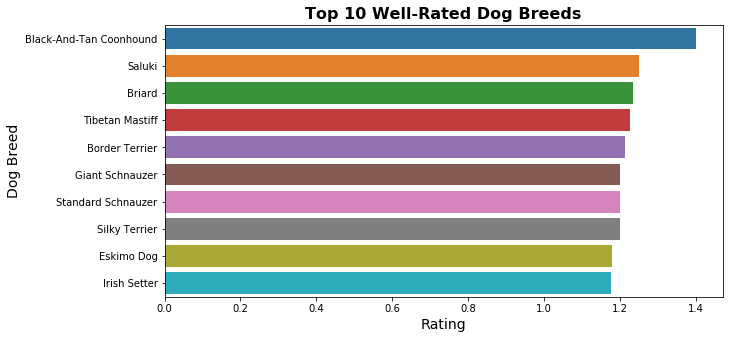

In [942]:
plt.figure(figsize=(10, 5))
sns.barplot(x='rating', y=df_dog_popularity.index, data=df_dog_popularity)
plt.title('Top 10 Well-Rated Dog Breeds', fontsize=16, weight='bold')
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Dog Breed', fontsize=14);

### Visualisation 2: Top 10 Favorited Dog Breeds

In [943]:
df_dog_favorite = df_combined[df_combined['prediction_1_dog'] == True]
df_dog_favorite = df_dog_favorite.groupby('prediction_1').mean()
df_dog_favorite = df_dog_favorite.sort_values(by='favorite_count', ascending=False)

In [944]:
df_dog_favorite = df_dog_favorite.head(10)

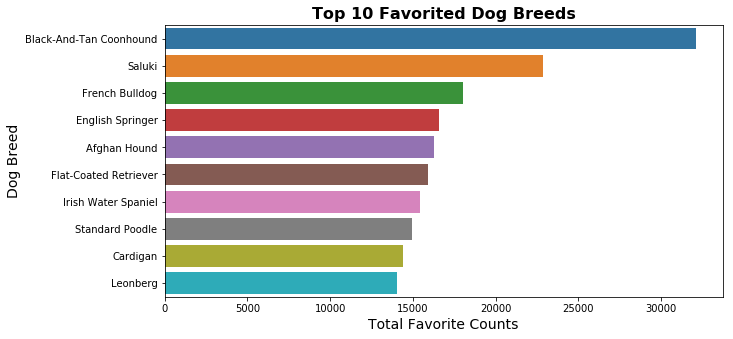

In [945]:
plt.figure(figsize=(10, 5))
sns.barplot(x='favorite_count', y=df_dog_favorite.index, data=df_dog_favorite)
plt.title('Top 10 Favorited Dog Breeds', fontsize=16, weight='bold')
plt.xlabel('Total Favorite Counts', fontsize=14)
plt.ylabel('Dog Breed', fontsize=14);

### Visualisation 3: Top 10 Predicted Dog Breeds

In [946]:
# Let's select the values with prediction confidence more than 75%
df_prediction = df_combined[(df_combined['prediction_1_dog'] == True) & (df_combined['prediction_1_confidence'] > 0.75)]
df_prediction = df_prediction.groupby('prediction_1').mean()
df_prediction = df_prediction.sort_values(by='prediction_1_confidence', ascending=False)

In [947]:
df_prediction = df_prediction.head(10)

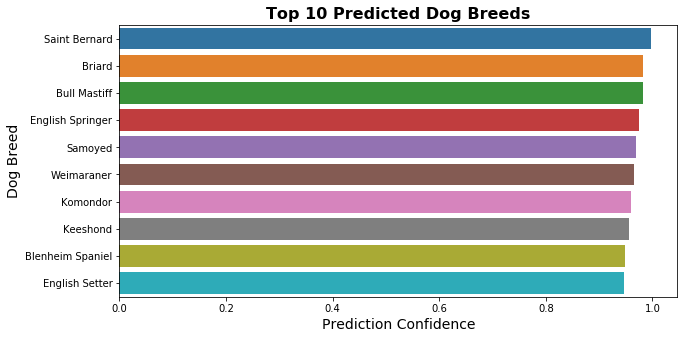

In [948]:
plt.figure(figsize=(10, 5))
sns.barplot(x='prediction_1_confidence', y=df_prediction.index, data=df_prediction)
plt.title('Top 10 Predicted Dog Breeds', fontsize=16, weight='bold')
plt.xlabel('Prediction Confidence', fontsize=14)
plt.ylabel('Dog Breed', fontsize=14);

### Visualisation 4: Top 10 Most Popular (i.e. Tweeted) Dog Breeds

In [949]:
df_most_tweeted = df_combined[df_combined['prediction_1_dog'] == True]
df_most_tweeted = df_most_tweeted.groupby('prediction_1').count()
df_most_tweeted = df_most_tweeted.sort_values(by='tweet_id', ascending=False)

In [950]:
df_most_tweeted = df_most_tweeted.head(10)

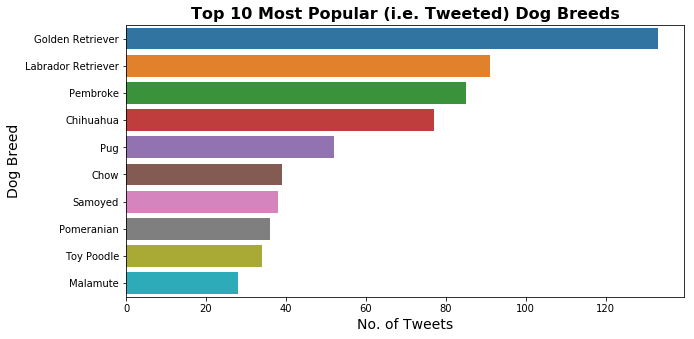

In [951]:
plt.figure(figsize=(10, 5))
sns.barplot(x='tweet_id', y=df_most_tweeted.index, data=df_most_tweeted)
plt.title('Top 10 Most Popular (i.e. Tweeted) Dog Breeds', fontsize=16, weight='bold')
plt.xlabel('No. of Tweets', fontsize=14)
plt.ylabel('Dog Breed', fontsize=14);

### Visualisation 5: Top 10 Predicted Items that are not Dogs

In [952]:
df_notdog = df_combined[(df_combined['prediction_1_dog'] == False) & (df_combined['prediction_1_confidence'] > 0.75)]
df_notdog = df_notdog.groupby('prediction_1').mean()
df_notdog = df_notdog.sort_values(by='prediction_1_confidence', ascending=False)

In [953]:
df_notdog = df_notdog.head(10)

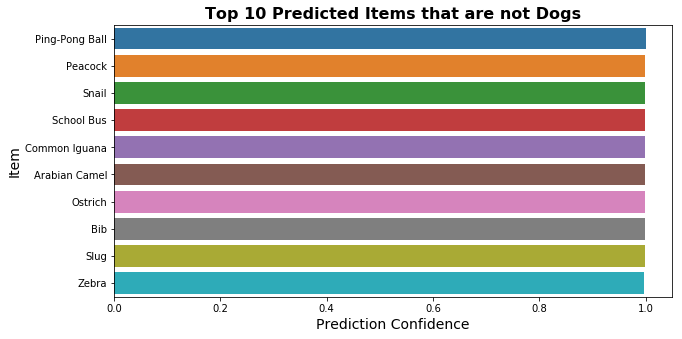

In [954]:
plt.figure(figsize=(10, 5))
sns.barplot(x='prediction_1_confidence', y=df_notdog.index, data=df_notdog)
plt.title('Top 10 Predicted Items that are not Dogs', fontsize=16, weight='bold')
plt.xlabel('Prediction Confidence', fontsize=14)
plt.ylabel('Item', fontsize=14);

## Insights
1. Black and Tan Coonhound is the dog breed with the highest ratings, followed by Saluk and Briard.
2. Black and Tan CoonHound is the dog breed with the most number of likes (i.e. favorites), followed by Saluk and French Bulldog.
3. In terms of prediction, Saint Bernard is the dog breed with the best prediction performance, followed by Briard and Bull Mastiff.
4. The most-tweeted dog breed is Golden Retriever, followed by Labrador Retriever and Pembroke.
5. The top predicted items (that was the result of a mistaken classification of the image of the dog for a non-dog item) is ping-pong ball, peacock and snail.